In [1]:
from aocd import get_data, submit
# from aocd.get import current_day

from IPython.display import display
from IPython.core.display import Markdown

import math
import numpy as np
import re
import sys

In [2]:
DAY = 21
YEAR = 2023

In [3]:
url = f"https://adventofcode.com/{YEAR}/day/{DAY}"
display(Markdown(f"#### See [{YEAR} Day {DAY}]({url})."))

#### See [2023 Day 21](https://adventofcode.com/2023/day/21).

In [354]:
data = get_data(year=YEAR, day=DAY)

In [408]:
data.splitlines()[:5]

['...................................................................................................................................',
 '...........#...........#..#....#...#.........#...##......#...................#.........#..#.....#.........#.......#......#.........',
 '....#..#...............#.....#......#....................#........................#.....#............#..##.......#..............#..',
 '...##....#.........#..#...#.#..............#.....#......#....................##....#..##.....##.............##.........###..#....#.',
 '....#.#........#..#.....................#...................................##.............###..........#...#............##........']

# Part A

In [409]:
# data = """...........
# .....###.#.
# .###.##..#.
# ..#.#...#..
# ....#.#....
# .##..S####.
# .##..#...#.
# .......##..
# .##.#.####.
# .##..##.##.
# ...........
# """

In [410]:
garden = np.array([list(l) for l in data.splitlines()])
start = np.where(garden == 'S')
start = (start[0][0], start[1][0])
garden[start]='.'

In [411]:
garden

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '#', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

In [428]:
max_steps = 64

dirs = [(1,0),(-1,0),(0,1),(0,-1)]
mr = range(garden.shape[0])
nr = range(garden.shape[1])



ending = np.zeros(garden.shape)
visited = set()

Q = [(start, 0)]
while Q:
    s, dist = Q.pop(0)
    if (s,dist) in visited:
        continue
    else:
        visited.add((s,dist))
    # print(s,dist)
    if dist < max_steps:
        for dir in dirs:
            n = (s[0]+dir[0], s[1]+dir[1])
            if garden[n] != '#' and s[0] in mr and s[1] in nr:
                Q.append((n,dist+1))
    else:
        ending[s] = 1

In [430]:
total = ending.sum()
total

3689.0

In [93]:
submit(total, year=YEAR, day=DAY)

answer a: None
submitting for part a
coerced float64 value 3689.0 for 2023/21


That's the right answer!  You are one gold star closer to restoring snow operations. [Continue to Part Two]


# Part B

In [356]:
garden = np.array([list(l) for l in data.splitlines()])
start = np.where(garden == 'S')
start = (start[0][0], start[1][0])
garden[start]='.'

In [363]:
def walk(max_steps):
    nr, nc = garden.shape
    dirs = [(1,0),(-1,0),(0,1),(0,-1)]
    
    
    visited = set()
    
    Q = [(start, 0)]
    while Q:
        s, dist = Q.pop()
        if dist >= max_steps or (s,dist) in visited:
            continue
        else:
            visited.add((s,dist))
        # print(s,dist)
        for dir in dirs:
            n = (s[0]+dir[0], s[1]+dir[1])
            if garden[(n[0] % nr, n[1] % nc)] != '#' :
                Q.append((n,dist+1))
    return visited

In [365]:
visited = walk(500)

In [328]:
import pandas as pd

In [394]:
start = 500
cycle = 455 - 324 
cycle

131

In [382]:
df = pd.Series([d for s,d in visited]).value_counts().rename('actual').sort_index().to_frame()
df['theoretical'] = (df.index + 1)**2
df['d1'] = df.actual.diff()
df['d2'] = df.d1.diff()
df['d3'] = df.d2.diff(cycle)
# for i in range(1,25):
#     df[f'diff_{i}'] = df.d2.diff(i)
#     df[f'pat_{i}'] = df[f'diff_{i}'] == df[f'diff_{i}'].shift(i)

<Axes: >

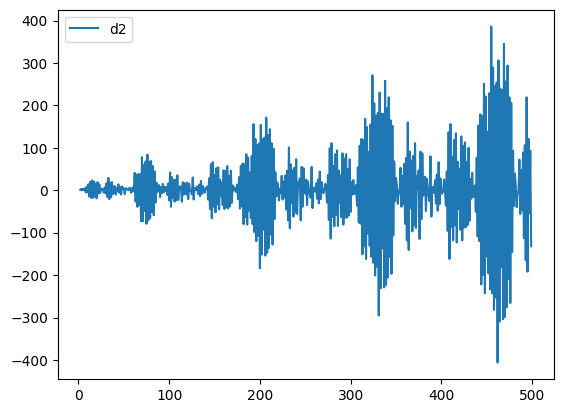

In [406]:
df[['d2']].plot()

In [379]:
df

,actual,theoretical,d1,d2,d3
0,1,1,NaN,NaN,NaN
1,4,4,3.0,NaN,NaN
2,8,9,4.0,1.0,NaN
3,15,16,7.0,3.0,NaN
4,22,25,7.0,0.0,NaN
5,32,36,10.0,3.0,NaN
6,43,49,11.0,1.0,NaN
7,58,64,15.0,4.0,NaN
8,68,81,10.0,-5.0,NaN
9,86,100,18.0,8.0,NaN


In [395]:
max_steps = 26501365
actual = list(df.actual)
d1 = list(df.d1)
d2 = list(df.d2)
d3 = list(df.d3)
for i in range(start, max_steps+1):
    # if i % 100000 ==0:
    #     print(i)
    d3.append(d3[i-cycle])
    d2.append(d2[i-cycle] + d3[i])
    d1.append(d1[i-1] + d2[i])
    actual.append(actual[i-1] + d1[i])

In [396]:
xx = pd.DataFrame({'actual':actual,'d1':d1,'d2':d2,'d3':d3})
xx.tail()

,actual,d1,d2,d3
26501361,6.101580e+14,37223301.0,-15577103.0,-77.0
26501362,6.101580e+14,60487842.0,23264541.0,115.0
26501363,6.101581e+14,45922215.0,-14565627.0,-72.0
26501364,6.101581e+14,62915452.0,16993237.0,84.0
26501365,6.101582e+14,46529113.0,-16386339.0,-81.0


<Axes: >

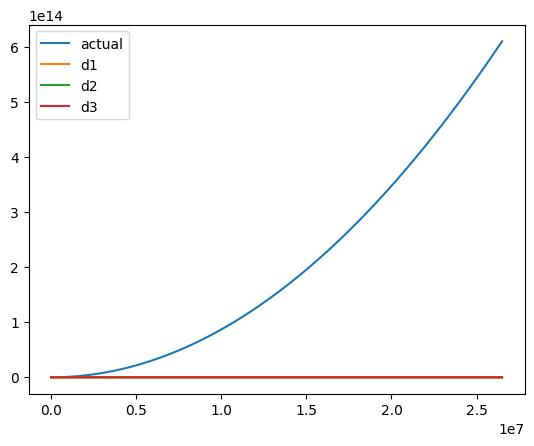

In [401]:
xx.loc[::1000].plot()

In [403]:
total = actual[-1]

In [404]:
submit(total, year=YEAR, day=DAY)

answer a: 3689
submitting for part b (part a is already completed)
coerced float value 610158187362102.0 for 2023/21


That's the right answer!  You are one gold star closer to restoring snow operations. You got rank 673 on this star's leaderboard.You have completed Day 21! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
